In [1]:
import os
import pickle
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import obspy
from obspy.clients.fdsn.client import Client 
import obspy
import pandas as pd
import scipy.ndimage
import geopy.distance
import random
client = Client('IRIS')
import scipy
import seaborn as sn
from geopy.distance import geodesic

import matplotlib 
plt.rcParams.update({'font.size': 14})

### Define Functions to grab detections and handle the file structure

In [77]:
# for [] lists
def reshape_flat_classifications(flat_list, record_size=6):
    return [flat_list[i:i+record_size] for i in range(0, len(flat_list), record_size)]
# for [[[]]] lists
def flatten_if_triple_nested(raw_data):
    if (
        isinstance(raw_data, list) and len(raw_data) > 0 and
        all(isinstance(block, list) and len(block) > 0 and isinstance(block[0], (list, tuple)) for block in raw_data)
    ):
        print("→ Detected triple-nested structure. Flattening one level.")
        return [record for block in raw_data for record in block]
    else:
        print("→ Structure is fine. No flattening needed.")
        return raw_data

def load_nested_classifications(station_codes, base_path='classifications'):
    classifications = {}
    for code in station_codes:
        file_path = os.path.join(base_path, f'{code}_raw.pickle')
        try:
            with open(file_path, 'rb') as handle:
                raw_data = pickle.load(handle)

                # Check for flat structure
                if isinstance(raw_data, list) and all(not isinstance(item, (list, tuple)) for item in raw_data):
                    print(f"→ Detected flat structure in {code}. Reshaping into records.")
                    corrected = reshape_flat_classifications(raw_data)
                else:
                    corrected = flatten_if_triple_nested(raw_data)

                classifications[code] = corrected
        except Exception as e:
            print(f"Error loading {code}: {e}")
            classifications[code] = []
    return classifications

# Plot frequency ratios using classifications & station codes
def plot_frequency_ratios(classifications, color_dict, bins=np.linspace(0, 2000, 50)):
    num_stations = len(classifications)
    rows = (num_stations + 1) // 2
    fig, ax = plt.subplots(rows, 2, figsize=(10, 8), sharex=True, sharey=True, tight_layout=True)

    for idx, (station, records) in enumerate(classifications.items()):
        row, col = divmod(idx, 2)

        # Flatten one more level if needed
        flat_records = [r for block in records for r in block] if isinstance(records[0], list) else records
        valid_ratios = [c[4] for c in flat_records if isinstance(c, (list, tuple)) and len(c) > 4 and isinstance(c[4], (int, float))]

        ax[row, col].hist(valid_ratios, bins=bins, color=color_dict.get(station, 'gray'), edgecolor='k', linewidth=0.5)
        ax[row, col].axvline(100, color='k', linewidth=2)
        ax[row, col].set_title(station)
        ax[row, col].set_yscale('log')

        if row == rows - 1:
            ax[row, col].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
        if col == 0:
            ax[row, col].set_ylabel('Count')

    fig.suptitle("Frequency Ratio Distributions across Stations (2013–2014)", fontsize=20)
    plt.show()


In [78]:
m01c_color = 'cornflowerblue'
j73c_color = 'navy'
m02c_color = 'lightgreen'
m03c_color = 'cyan'
m04c_color = 'forestgreen'
j65c_color = 'teal'
j59c_color = 'fuchsia'
j58c_color = 'cadetblue'
fn16c_color = 'lightblue'
fn13c_color = 'moccasin'
fn11c_color = 'darkorange'
fn17c_color = 'seagreen'
j49c_color = 'salmon'

→ Detected triple-nested structure. Flattening one level.
→ Detected triple-nested structure. Flattening one level.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.
→ Structure is fine. No flattening needed.


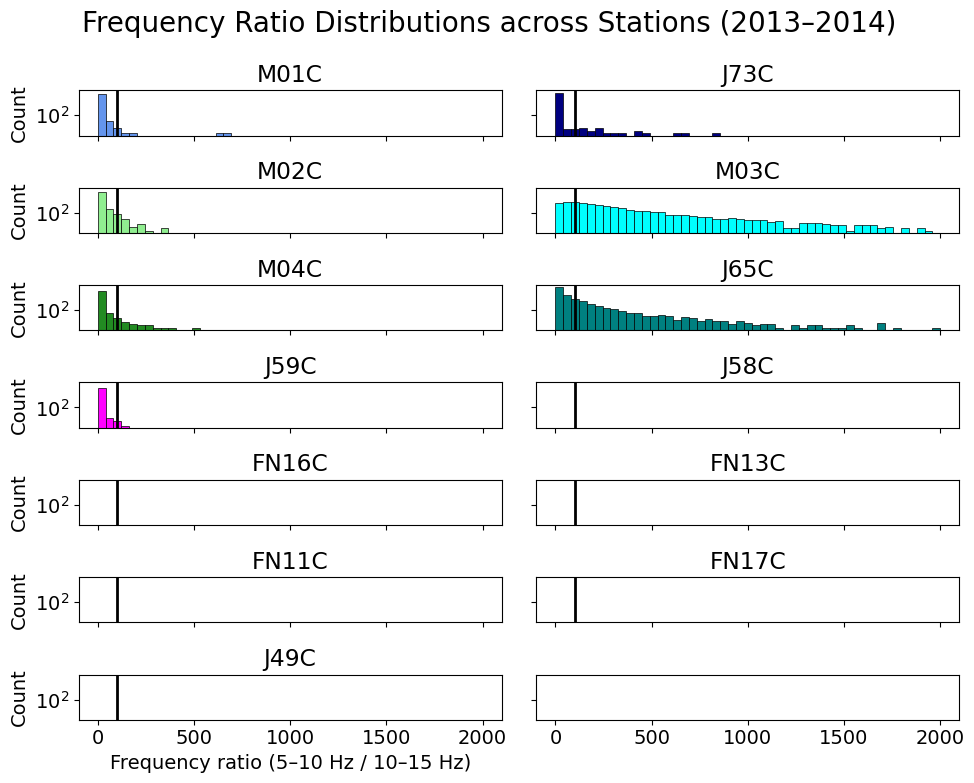

In [79]:
station_codes = ['M01C', 'J73C', 'M02C', 'M03C', 'M04C', 'J65C', 'J59C', 'J58C', 'FN16C', 'FN13C', 'FN11C', 'FN17C', 'J49C']
colors = {  'M01C': m01c_color,
            'J73C': j73c_color,
            'M02C': m02c_color,
            'M03C': m03c_color,
            'M04C': m04c_color,
            'J65C': j65c_color,
            'J59C': j59c_color,
            'J58C': j58c_color,
            'FN16C': fn16c_color,
            'FN13C': fn13c_color,
            'FN11C': fn11c_color,
            'FN17C': fn17c_color,
            'J49C': j49c_color}

classifications = load_nested_classifications(station_codes)

plot_frequency_ratios(classifications, colors)


In [66]:
# File 1
file_name = 'classifications/M01C_raw.pickle'
with open(file_name, 'rb') as handle:
    m01c_raw = pickle.load(handle)
classification_blocks1 = [block for block in m01c_raw if isinstance(block, list) and len(block) > 0]
m01c_classifications = [record for block in classification_blocks1 for record in block]
#display(m01c_classifications[4])

# File 2
file_name = 'classifications/J73C_raw.pickle'
with open(file_name, 'rb') as handle:
    j73c_raw = pickle.load(handle)
classification_blocks2 = [block for block in j73c_raw if isinstance(block, list) and len(block) > 0]
j73c_classifications = [record for block in classification_blocks2 for record in block]
#display(j73c_classifications[:1])

# File 3
file_name = 'classifications/M02C_raw.pickle'
with open(file_name, 'rb') as handle:
    m02c_raw = pickle.load(handle)
classification_blocks3 = [block for block in m02c_raw if isinstance(block, list) and len(block) > 0]
m02c_classifications = [record for block in classification_blocks3 for record in block]
display(m02c_classifications[1][4])

# File 4
file_name = 'classifications/M03C_raw.pickle'
with open(file_name, 'rb') as handle:
    m03c_raw = pickle.load(handle)
classification_blocks3 = [block for block in m03c_raw if isinstance(block, list) and len(block) > 0]
m03c_classifications = [record for block in classification_blocks3 for record in block]
#display(m03c_classifications[1:])

# File 5
file_name = 'classifications/M04C_raw.pickle'
with open(file_name, 'rb') as handle:
    m04c_raw = pickle.load(handle)
classification_blocks3 = [block for block in m04c_raw if isinstance(block, list) and len(block) > 0]
m04c_classifications = [record for block in classification_blocks3 for record in block]
#display(m04c_classifications[1:])

# File 6
file_name = 'classifications/J65C_raw.pickle'
with open(file_name, 'rb') as handle:
    j65c_raw = pickle.load(handle)
classification_blocks3 = [block for block in j65c_raw if isinstance(block, list) and len(block) > 0]
j65c_classifications = [record for block in classification_blocks3 for record in block]
#display(j65c_classifications[1:])


18.014590670196814

In [3]:
# How many T-phases?
print(len([c for c in m01c_classifications if c[2]<2])/len(m01c_classifications))
print(len([c for c in j73c_classifications if c[2]<2])/len(j73c_classifications))
print(len([c for c in m02c_classifications if c[2]<2])/len(m02c_classifications))
print(len([c for c in m03c_classifications if c[2]<2])/len(m03c_classifications))
print(len([c for c in m04c_classifications if c[2]<2])/len(m04c_classifications))
print(len([c for c in j65c_classifications if c[2]<2])/len(j65c_classifications))

TypeError: '<' not supported between instances of 'list' and 'int'

In [4]:
# Isolate detections consistent with tremor
threshold = 100
m01c_tremor = [c for c in m01c_classifications if (c[4]>threshold) & (c[2]>1)]

j73c_tremor = [c for c in j73c_classifications if (c[4]>threshold) & (c[2]>1)]

m02c_tremor = [c for c in m02c_classifications if (c[4]>threshold) & (c[2]>1)]

m03c_tremor = [c for c in m03c_classifications if (c[4]>threshold) & (c[2]>1)]

m04c_tremor = [c for c in m04c_classifications if (c[4]>threshold) & (c[2]>1)]

j65c_tremor = [c for c in j65c_classifications if (c[4]>threshold) & (c[2]>1)]

TypeError: '>' not supported between instances of 'list' and 'int'

In [ ]:
print(len(m01c_tremor))
print(len(j73c_tremor))
print(len(m02c_tremor))
print(len(m03c_tremor))
print(len(m04c_tremor))
print(len(j65c_tremor))

## Plot all emergent detections, and those consistent with tremor

In [ ]:
fig,ax = plt.subplots(2,figsize=[12,6],tight_layout=True,sharex=True)

ax[0].set_xlim([datetime.datetime(2014,9,1),datetime.datetime(2015,7,1)])

t1 = datetime.datetime(2013,9,1)
t2 = datetime.datetime(2014,7,1)
timebins = pd.date_range(start=t1, end=t2, freq='12h')
ax[0].hist([c[0][0].datetime for c in j26c_classifications],bins=timebins,label='J26C',color=j26c_color,linewidth=0.3,edgecolor='k');
ax[0].hist([c[0][0].datetime for c in j34c_classifications],bins=timebins,label='J34C',color=j34c_color,linewidth=0.3,edgecolor='k');
ax[0].hist([c[0][0].datetime for c in j59c_classifications],bins=timebins,label='J59C',color=j59c_color,linewidth=0.3,edgecolor='k');
# ax[0].set_title('All STA/LTA detections')
ax0 = ax[0].twinx()
#ax0.hist([t.datetime for t in tremor[0]],bins=timebins,histtype='step',edgecolor='k',label='Todd et al. catalog',linewidth=2);
ax[0].legend()
#ax0.set_ylabel('Todd et al. Catalog')

ax[1].hist([c[0][0].datetime for c in j26c_tremor],bins=timebins,label='J26C',color=j26c_color,linewidth=0.3,edgecolor='k');
ax[1].hist([c[0][0].datetime for c in j34c_tremor],bins=timebins,label='J34C',color=j34c_color,linewidth=0.3,edgecolor='k',alpha=0.7);
ax[1].hist([c[0][0].datetime for c in j59c_tremor],bins=timebins,label='J59C',color=j59c_color,linewidth=0.3,edgecolor='k');
# ax[1].set_title('Cataloged tremor vs. single-station tremor detections (Frequency Ratio > 100)')
ax1 = ax[1].twinx()
#ax1.hist([t.datetime for t in tremor[0]],bins=timebins,histtype='step',edgecolor='k',linewidth=2.5,label='Todd et al. catalog');
#ax1.set_ylabel('Todd et al. Catalog')
# ax[1].set_ylabel('Single-station tremor')
ax1.legend()


# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/hikurangi_detections.eps', bbox_inches='tight',dpi=400)


### Plot distribution of frequency ratios

In [ ]:
fig,ax = plt.subplots(1,figsize=[6,5])

bins = np.linspace(0,2000,50)
ax.hist([c[4] for c in j26c_classifications],bins=bins,label='J26C',color=j26c_color,edgecolor='k',linewidth=0.5);
ax.hist([c[4] for c in j34c_classifications],bins=bins,label='J34C',color=j34c_color,edgecolor='k',linewidth=0.5);
ax.hist([c[4] for c in j59c_classifications],bins=bins,label='J59C',color='w',edgecolor='k',linewidth=0.5);
#ax.hist([c[4] for c in lobs2_classifications],bins=bins,label='LOBS2',color=lobs6_color,edgecolor='k',linewidth=0.5);
ax.set_yscale('log')
ax.axvline(100,color='k',linewidth=2)
ax.set_title('Frequency Ratios of Detections')
ax.set_xlabel('Frequency ratio (5-10 Hz / 10-15 Hz)')
ax.legend()

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/hikurangi_fr.eps', bbox_inches='tight',dpi=400)

In [ ]:
fig, ax = plt.subplots(7, 2, figsize=(10, 8), sharex=True, sharey=True, tight_layout=True)

bins = np.linspace(0, 2000, 50)

# Panel [0, 0]: M01C
ax[0, 0].hist([c[4] for c in m01c_classifications],bins=bins, color=m01c_color, edgecolor='k', linewidth=0.5)
ax[0, 0].axvline(100, color='k', linewidth=2)
ax[0, 0].set_title('M01C')
ax[0, 0].set_yscale('log')

# Panel [0, 1]: J73C
ax[0, 1].hist([c[4] for c in j73c_classifications], bins=bins, color=j73c_color, edgecolor='k', linewidth=0.5)
ax[0, 1].axvline(100, color='k', linewidth=2)
ax[0, 1].set_title('J73C')
ax[0, 1].set_yscale('log')

# Panel [1, 0]: M02C
ax[1, 0].hist([c[4] for c in m02c_classifications], bins=bins, color=m02c_color, edgecolor='k', linewidth=0.5)
ax[1, 0].axvline(100, color='k', linewidth=2)
ax[1, 0].set_title('M02C')
ax[1, 0].set_yscale('log')

# Panel [1, 1]: M03C
ax[1, 1].hist([c[4] for c in m03c_classifications], bins=bins, color=m03c_color, edgecolor='k', linewidth=0.5)
ax[1, 1].axvline(100, color='k', linewidth=2)
ax[1, 1].set_title('M03C')
ax[1, 1].set_ylabel('Count')
ax[1, 1].set_yscale('log')

# Panel [2, 0]: M04C
ax[2, 0].hist([c[4] for c in m04c_classifications], bins=bins, color=m04c_color, edgecolor='k', linewidth=0.5)
ax[2, 0].axvline(100, color='k', linewidth=2)
ax[2, 0].set_title('M04C')
ax[2, 0].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[2, 0].set_yscale('log')

# Panel [2, 1]: J65C
ax[2, 1].hist([c[4] for c in j65c_classifications], bins=bins, color=j65c_color, edgecolor='k', linewidth=0.5)
ax[2, 1].axvline(100, color='k', linewidth=2)
ax[2, 1].set_title('J65C')
ax[2, 1].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[2, 1].set_yscale('log')

fig.suptitle("Frequency Ratio Distributions across Stations (2014-2015)", fontsize=20)

plt.show()


fig, ax = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True, tight_layout=True)

bins = np.linspace(0, 2000, 50)

# Panel [0, 0]: J26C
ax[0, 0].hist([c[4] for c in j26c_classifications],
              bins=bins, color=j26c_color,
              edgecolor='k', linewidth=0.5)
ax[0, 0].axvline(100, color='k', linewidth=2)
ax[0, 0].set_title('J26C')
ax[0, 0].set_yscale('log')

# Panel [0, 1]: J34C
ax[0, 1].hist([c[4] for c in j34c_classifications],
              bins=bins, color=j34c_color,
              edgecolor='k', linewidth=0.5)
ax[0, 1].axvline(100, color='k', linewidth=2)
ax[0, 1].set_title('J34C')
ax[0, 1].set_yscale('log')

# Panel [1, 0]: J59C
ax[1, 0].hist([c[4] for c in j59c_classifications],
              bins=bins, color=j59c_color,
              edgecolor='k', linewidth=0.5)
ax[1, 0].axvline(100, color='k', linewidth=2)
ax[1, 0].set_title('J59C')
ax[1, 0].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[1, 0].set_ylabel('Count')
ax[1, 0].set_yscale('log')

# Panel [1, 1]: J67C
ax[1, 1].hist([c[4] for c in j67c_classifications],
              bins=bins, color=j67c_color,
              edgecolor='k', linewidth=0.5)
ax[1, 1].axvline(100, color='k', linewidth=2)
ax[1, 1].set_title('J67C')
ax[1, 1].set_xlabel('Frequency ratio (5–10 Hz / 10–15 Hz)')
ax[1, 1].set_yscale('log')

plt.show()
## How close in time are our detections to the Todd detections?

In [ ]:
# For each of Todd's tremor detections, when is the closest (in time) STA/LTA detection?

todd_times = tremor[0]

# Compare to EBS3 times
ebs3_times = [e[0] for e in ebs3_tremor]
min_diff1 = []
for tt in todd_times:
    diffs1 = [np.abs(tt-t[0]) for t in ebs3_times]
    diffs2 = [np.abs(tt-t[1]) for t in ebs3_times]
    min_diff1.append(min(min(diffs1),min(diffs2)))
    
# Compare to EBS5 times
ebs5_times = [e[0] for e in ebs5_tremor]
min_diff2 = []
for tt in todd_times:
    diffs1 = [np.abs(tt-t[0]) for t in ebs5_times]
    diffs2 = [np.abs(tt-t[1]) for t in ebs5_times]
    min_diff2.append(min(min(diffs1),min(diffs2)))
    
# Get distance between EBS3 and Todd tremor
station_loc = [-38.694599,178.650604]
ebs3_dist = []
for i in range(len(tremor[0])):
    ebs3_dist.append(geodesic([tremor[1][i],tremor[2][i]],station_loc).km)
    
# Get distance between EBS5 and Todd tremor
station_loc = [-38.9944,178.325699]
ebs5_dist = []
for i in range(len(tremor[0])):
    ebs5_dist.append(geodesic([tremor[1][i],tremor[2][i]],station_loc).km)

In [ ]:
fig,ax = plt.subplots(2,figsize=[12,6],sharex=True)

ax[0].set_xlim([datetime.datetime(2014,9,1),datetime.datetime(2014,11,1)])

# EBS3
ax[0].plot([t.datetime for t in todd_times],min_diff1,'ko',label='Time to nearest detection')
ax[0].axhline(500,color='k',linestyle='--')
ax0 = ax[0].twinx()
ax0.plot([t.datetime for t in todd_times],ebs3_dist,'.',label='Distance to nearest detection')
ax0.set_ylim([0,60])
ax[0].legend()
ax0.legend()
ax[0].set_ylabel('Time (s)')
ax0.set_ylabel('Distance (km)')

# EBS5
ax[1].plot([t.datetime for t in todd_times],min_diff2,'ko')
ax[1].axhline(500,color='k',linestyle='--')
ax1 = ax[1].twinx()
ax1.plot([t.datetime for t in todd_times],ebs5_dist,'.')
ax1.set_ylim([0,60])
ax[1].set_ylabel('Time (s)')
ax1.set_ylabel('Distance (km)')

ax[0].set_xlim([datetime.datetime(2014,9,1),datetime.datetime(2014,11,1)])

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/hikurangi_timing.eps', bbox_inches='tight',dpi=400)

## Does the rate of the Todd et al. catalog correspond with the average spacing? (for the Supporting Information)

In [ ]:
# Calculate daily rate of Todd et al.
# Calculate average spacing

# Loop through days
t1 = obspy.UTCDateTime(2014,9,1)
t2 = obspy.UTCDateTime(2014,11,1)
time_bins = pd.date_range(start=t1.datetime, end=t2.datetime, freq='d')

ebs3_rate = []
ebs3_spacing = []
for tt in time_bins:
    
    start = tt
    end = tt + datetime.timedelta(days=1)
    
    check_ind = [i for i,d in enumerate(todd_times) if (d>start) & (d<end)]
    tremor_times = [i for i,d in enumerate(ebs3_times) if (d[0]>start) & (d[0]<end)]
    
    if (len(check_ind)>0) & (len(tremor_times)>0):
        ebs3_rate.append(len(tremor_times))
        ebs3_spacing.append(np.mean([min_diff1[i] for i in check_ind]))

ebs5_rate = []
ebs5_spacing = []
for tt in time_bins:
    
    start = tt
    end = tt + datetime.timedelta(days=1)
    
    check_ind = [i for i,d in enumerate(todd_times) if (d>start) & (d<end)]
    tremor_times = [i for i,d in enumerate(ebs5_times) if (d[0]>start) & (d[0]<end)]
    
    if (len(check_ind)>0) & (len(tremor_times)>0):
        ebs5_rate.append(len(tremor_times))
        ebs5_spacing.append(np.mean([min_diff2[i] for i in check_ind]))

In [ ]:
%matplotlib inline

fig,ax = plt.subplots(1,figsize=[4,4])
ax.plot([1/r for r in ebs3_rate],[s/86400 for s in ebs3_spacing],'.')
ax.set_xlabel('Reciprocal of daily tremor rate')
ax.set_ylabel('Average spacing (days)')
ax.set_title('EBS3')
# Plot 1:1 line
ax.plot(np.linspace(0,1),np.linspace(0,1),'-')
ax.set_xlim([0,0.2])
ax.set_ylim([0,0.2])

In [ ]:
%matplotlib inline

fig,ax = plt.subplots(1,figsize=[4,4])
ax.plot([1/r for r in ebs5_rate],[s/86400 for s in ebs5_spacing],'.')
ax.set_xlabel('Reciprocal of daily tremor rate')
ax.set_ylabel('Average spacing (days)')
ax.set_title('EBS5')
# Plot 1:1 line
ax.plot(np.linspace(0,1),np.linspace(0,1),'-')
ax.set_xlim([0,0.2])
ax.set_ylim([0,0.2])

# plt.savefig('/Users/zoekrauss/ooi_tremor/tremor_figs/ebs5_timing.eps', bbox_inches='tight',dpi=400)

## Distance to tremor versus amplitude

In [ ]:
stations = ['EBS5','EBS3','EBS2','EBS4','LOBS1','LOBS2','LOBS6','LOBS8']
sta_loc = [[-38.9944,178.325699],[-38.694599,178.650604],[-38.7771,178.583496],[-38.688801,178.819901],[-38.592098,178.818695],[-38.620998,179.046097],[-38.977798,178.796005],[-38.843201,178.459396]]

# EBS stations only
ebs_tremor_amp = []
ebs_tremor_dist = []
ebs_tremor_amp_median = []
stations1 = stations[0:4]
sta_loc1 = sta_loc[0:4]
for i in [35,50,55,61,80]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    
    tremor_amp1 = []
    tremor_dist1 = []
    tremor_med1 = []


    for i,s in enumerate(stations1):

        t1 = tremor_t+60
        t2 = tremor_t+150

        st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
        st1.remove_response()
        st1.filter('bandpass',freqmin=3,freqmax=10)
        st1.trim(starttime=t1,endtime=t2)

        tremor_amp1.append(np.max(st1[0].data))
        tremor_med1.append(np.median(st1[0].data))
        tremor_dist1.append(geodesic(tremor_loc,sta_loc1[i]).km)

    ebs_tremor_amp.append(tremor_amp1)
    ebs_tremor_amp_median.append(tremor_med1)
    ebs_tremor_dist.append(tremor_dist1)

# Then the LOBS stations- which don't all measure it each time
    
yes_tremor_amp35 = []
yes_tremor_dist35 = []
no_tremor_amp35 = []
no_tremor_dist35 = []
i = 35
for j in [4,6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp35.append(np.max(st1[0].data))
    yes_tremor_dist35.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp35.append(np.max(st1[0].data))
    no_tremor_dist35.append(geodesic(tremor_loc,sta_loc[j]).km)

yes_tremor_amp50 = []
yes_tremor_dist50 = []
no_tremor_amp50 = []
no_tremor_dist50 = []
i = 50
for j in [4,6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp50.append(np.max(st1[0].data))
    yes_tremor_dist50.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp50.append(np.max(st1[0].data))
    no_tremor_dist50.append(geodesic(tremor_loc,sta_loc[j]).km)
    
yes_tremor_amp55 = []
yes_tremor_dist55 = []
no_tremor_amp55 = []
no_tremor_dist55 = []
i = 55
for j in [4,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp55.append(np.max(st1[0].data))
    yes_tremor_dist55.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [5,6]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp55.append(np.max(st1[0].data))
    no_tremor_dist55.append(geodesic(tremor_loc,sta_loc[j]).km)
    
yes_tremor_amp61 = []
yes_tremor_dist61 = []
no_tremor_amp61 = []
no_tremor_dist61 = []
i = 61
for j in [6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp61.append(np.max(st1[0].data))
    yes_tremor_dist61.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [4,5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp61.append(np.max(st1[0].data))
    no_tremor_dist61.append(geodesic(tremor_loc,sta_loc[j]).km) 
    
yes_tremor_amp80 = []
yes_tremor_dist80 = []
no_tremor_amp80 = []
no_tremor_dist80 = []
i = 80
for j in [6,7]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    yes_tremor_amp80.append(np.max(st1[0].data))
    yes_tremor_dist80.append(geodesic(tremor_loc,sta_loc[j]).km)
for j in [4,5]:
    tremor_t = tremor[0][i]
    tremor_loc = [tremor[1][i],tremor[2][i]]
    t1 = tremor_t+60
    t2 = tremor_t+150
    s = stations[j]
    st1 = client.get_waveforms("YH",s, "*", "HH1,EH1", t1-5,t2+5,attach_response=True);
    st1.remove_response()
    st1.filter('bandpass',freqmin=3,freqmax=10)
    st1.trim(starttime=t1,endtime=t2)
    no_tremor_amp80.append(np.max(st1[0].data))
    no_tremor_dist80.append(geodesic(tremor_loc,sta_loc[j]).km)

In [ ]:
%matplotlib widget


labels = ['2014-10-15T03:47:59',
         '2014-10-16T08:26:59',
         '2014-10-19T09:04:59',
         '2014-10-21-20:51:00',
         '2014-10-25T04:50:00']

colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

fig,ax = plt.subplots(1,figsize=[7,7])
for i in range(len(ebs_tremor_amp)):
    ax.plot(ebs_tremor_dist[i],ebs_tremor_amp[i],'o',label=labels[i],color=colors[i],markeredgewidth=0.5,markeredgecolor='k',markersize=15)

ax.set_yscale('log')
# ax.set_ylim([1e-6,1e-4])
ax.set_title('')

ax.set_xlabel('Distance from tremor (km)')
ax.set_ylabel('Amplitude (m/s)')
ax.legend()

# plt.savefig('/Users/zoekrauss/ooi_tremor/individual_detections/hikurangi_amplitudes_ebsonly.eps', bbox_inches='tight',dpi=400)